In [ ]:
! pip install transformers

     |████████████████████████████████| 3.5 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 47.0 MB/s 
     |████████████████████████████████| 596 kB 47.9 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 6.8 MB 37.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import time
import torch 
import numpy as np
from torch.utils.data import DataLoader, RandomSampler
from transformers import DistilBertTokenizer,DistilBertModel,AdamW, BertForSequenceClassification
from torch.utils.data import TensorDataset
import pandas as pd

In [ ]:
if torch.cuda.is_available():
  print("CUDA available")
else:
  ("Change runtime device")

CUDA available


#Data Imports, Cleaning, etc

In [ ]:
train_en = pd.read_csv("jigsaw-toxic-comment-train_en_clean.csv")
train_es = pd.read_csv("jigsaw-toxic-comment-train_es_clean.csv")
train_fr = pd.read_csv("jigsaw-toxic-comment-train_fr_clean.csv")
train_it = pd.read_csv("jigsaw-toxic-comment-train_it_clean.csv")
train_pt = pd.read_csv("jigsaw-toxic-comment-train_pt_clean.csv")
train_ru = pd.read_csv("jigsaw-toxic-comment-train_ru_clean.csv")
train_tr = pd.read_csv("jigsaw-toxic-comment-train_tr_clean.csv")


In [ ]:
train_data_amount = 10000
test_data_amount = 3500
val_data_amount = 5000

In [ ]:
train_df = pd.concat([train_en[:train_data_amount], train_es[:train_data_amount], train_fr[:train_data_amount], train_it[:train_data_amount], train_pt[:train_data_amount], train_ru[:train_data_amount], train_tr[:train_data_amount]], ignore_index=True)

Paste into console:

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#toolbar-add-text").click() 
}setInterval(ClickConnect,120000)

In [ ]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
LABEL_COLUMNS = ["toxic"]
train_toxic = train_df[train_df[LABEL_COLUMNS].sum(axis=1) > 0]
train_clean = train_df[train_df[LABEL_COLUMNS].sum(axis=1) == 0]

In [ ]:
train_toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it.. @ | talk . What is it... a...,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! Don't look, come or think of comming ba...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? Archangel WHit...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [ ]:
train_clean.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train_toxic = train_toxic.drop(columns = ['severe_toxic','obscene', 'threat', 'insult', 'identity_hate'])
train_toxic.head()


,id,comment_text,toxic
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
12,0005c987bdfc9d4b,Hey... what is it.. @ | talk . What is it... a...,1
16,0007e25b2121310b,"Bye! Don't look, come or think of comming ba...",1
42,001810bf8c45bf5f,You are gay or antisemmitian? Archangel WHit...,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1


In [ ]:
train_clean = train_clean.drop(columns = ['severe_toxic','obscene', 'threat', 'insult', 'identity_hate'])
train_clean.head()

,id,comment_text,toxic
0,0000997932d777bf,Explanation Why the edits made under my userna...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,""" More I can't make any real suggestions on im...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
train_clean.shape

(63203, 3)

In [ ]:
train_df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
69995,1a790ff1007a10e3,Sayılar başlangıçta ayrı olarak listelenebilir...,0,0,0,0,0,0
69996,1a7a4868968e2b9e,"Bu ikisi aynı fikirde değil, değil mi? 206.170...",0,0,0,0,0,0
69997,1a7c3bec9a71415d,"Bağlantı kurmak için """" Lance Thomas """" ı """" L...",0,0,0,0,0,0
69998,1a7c9c14b0cf0fe0,devletler Mahkemeler: Eyalet yasaları ve eyal...,0,0,0,0,0,0
69999,1a7d550fec6e9777,Dostum). Ama Nottingham hakkında bu şey ne hak...,0,0,0,0,0,0


In [ ]:
concat_df = pd.concat([train_toxic, train_clean])
concat_df.head()

,id,comment_text,toxic
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
12,0005c987bdfc9d4b,Hey... what is it.. @ | talk . What is it... a...,1
16,0007e25b2121310b,"Bye! Don't look, come or think of comming ba...",1
42,001810bf8c45bf5f,You are gay or antisemmitian? Archangel WHit...,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1


In [ ]:
train_data = concat_df.sample(frac=1).reset_index(drop=True)
train_data.head()


,id,comment_text,toxic
0,188961c4fc3c4db5,"Еврей или немец? Итак, поскольку Хефнер - нем...",0
1,0d3b57f3b2db3f03,"... bu yüzden yaptım .... şerefe, (konuşma · c...",0
2,0ea0d3895437d2fb,Противостоять всем. Я собирался поддержать вещ...,0
3,0f775b8ba97b2612,Quelle est votre couleur préférée,0
4,0fae0b26846370e8,"Ah, Michael! Çok uzun zaman oldu. Tabii ki uy...",0


In [ ]:
train_data.shape

(70000, 3)

In [ ]:
test_labels_df = pd.read_csv('test_labels.csv')
test_df = pd.read_csv('test.csv')
test_labels_df.head()


,id,toxic
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [ ]:
test_df=test_df.drop(columns='id')
test_df.head()

,content,lang
0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,"Quindi tu sei uno di quelli conservativi , ...",it
3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


In [ ]:
test_concat_df = pd.concat([test_labels_df,test_df], axis=1,join="inner")
test_concat_df.head()

,id,toxic,content,lang
0,0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,0,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,1,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,0,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,0,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


In [ ]:
test_concat_df = test_concat_df.drop(columns = ['lang'])
test_concat_df.head()

,id,toxic,content
0,0,0,Doctor Who adlı viki başlığına 12. doctor olar...
1,1,0,"Вполне возможно, но я пока не вижу необходимо..."
2,2,1,"Quindi tu sei uno di quelli conservativi , ..."
3,3,0,Malesef gerçekleştirilmedi ancak şöyle bir şey...
4,4,0,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...


In [ ]:
test_concat_df['comment_text'] = test_concat_df['content']
test_data = test_concat_df[['id','comment_text','toxic']].copy()
test_data.head()

,id,comment_text,toxic
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,0
1,1,"Вполне возможно, но я пока не вижу необходимо...",0
2,2,"Quindi tu sei uno di quelli conservativi , ...",1
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,0
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,0


In [ ]:
val_en = pd.read_csv('validation_en.csv')
val_es = pd.read_csv('validation_es.csv')
val_fr = pd.read_csv('validation_fr.csv')
val_it = pd.read_csv('validation_it.csv')
val_pt = pd.read_csv('validation_pt.csv')
val_ru = pd.read_csv('validation_ru.csv')
val_tr = pd.read_csv('validation_tr.csv')

In [ ]:
val_data = pd.concat([val_en[:val_data_amount], val_es[:val_data_amount], val_fr[:val_data_amount], val_it[:val_data_amount], val_pt[:val_data_amount], val_ru[:val_data_amount], val_tr[:val_data_amount]], ignore_index=True)
val_data = val_data.sample(frac=1).reset_index(drop=True)

In [ ]:
val_data.head()

,id,comment_text,toxic
0,1690,"Знаешь что? Я надеюсь от всего сердца, что ты ...",1
1,3761,"То же самое касается актеров голоса, которые п...",0
2,4252,"Ваша энциклопедия, целью которой является расп...",0
3,60,"Bonjour Gökhan, Le fichier que vous avez créé:...",0
4,842,"Na tabela de países, diz Você sabe mais do que...",0


In [ ]:
val_data.shape

(35000, 3)

In [ ]:
train_data.shape

(70000, 3)

In [ ]:
test_data = test_data[:test_data_amount]
test_data.shape

(3500, 3)

In [ ]:
test_data.head()

,id,comment_text,toxic
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,0
1,1,"Вполне возможно, но я пока не вижу необходимо...",0
2,2,"Quindi tu sei uno di quelli conservativi , ...",1
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,0
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,0


In [ ]:
val_data.head()

,id,comment_text,toxic
0,1690,"Знаешь что? Я надеюсь от всего сердца, что ты ...",1
1,3761,"То же самое касается актеров голоса, которые п...",0
2,4252,"Ваша энциклопедия, целью которой является расп...",0
3,60,"Bonjour Gökhan, Le fichier que vous avez créé:...",0
4,842,"Na tabela de países, diz Você sabe mais do que...",0


In [ ]:
train_data.head()

,id,comment_text,toxic
0,188961c4fc3c4db5,"Еврей или немец? Итак, поскольку Хефнер - нем...",0
1,0d3b57f3b2db3f03,"... bu yüzden yaptım .... şerefe, (konuşma · c...",0
2,0ea0d3895437d2fb,Противостоять всем. Я собирался поддержать вещ...,0
3,0f775b8ba97b2612,Quelle est votre couleur préférée,0
4,0fae0b26846370e8,"Ah, Michael! Çok uzun zaman oldu. Tabii ki uy...",0


In [ ]:
test_data.dtypes

id               int64
comment_text    object
toxic            int64
dtype: object

In [ ]:
print(test_data.shape,
train_data.shape,
val_data.shape)

(3500, 3) (70000, 3) (35000, 3)


In [ ]:
df1 = train_data
train_comments = df1.comment_text.values
train_labels = df1.toxic.values
print(train_comments[0], train_labels[0])

Еврей или немец?  Итак, поскольку Хефнер - немецкая фамилия - он немецкого или еврейского происхождения? 0


In [ ]:
df2 = val_data
val_comments = df2.comment_text.values
val_labels = df2.toxic.values

print(val_comments[0]), print(val_labels[0])

Знаешь что? Я надеюсь от всего сердца, что ты умрешь в автомобильной аварии со всей семьей, лучше, если бы сгорел заживо в туннеле, но и утонул в реке, было бы неплохо, МНОГО ЧЕРТА, ЧТО ТЫ НЕ ДРУГОЙ! Я действительно желаю вам всем сердцем.
1


(None, None)

In [ ]:
df3 = test_data
test_comments = df3.comment_text.values
test_labels = df3.toxic.values

print(test_comments[0]), print(test_labels[0])

Doctor Who adlı viki başlığına 12. doctor olarak bir viki yazarı kendi adını eklemiştir. Şahsen düzelttim. Onaylarsanız sevinirim. Occipital 
0


(None, None)

In [ ]:
bert_model = DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

Downloading:   0%|          | 0.00/466 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/517M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

In [ ]:
def tokenize(comments,labels):
  
    input_ids_list = []
    attention_masks_list= []

    for comment in comments:
        encoded_dict = tokenizer.encode_plus(
                        comment,                      
                        add_special_tokens = True, 
                        max_length = 64,           
                        pad_to_max_length = True,
                        return_attention_mask = True,   
                        return_tensors = 'pt',     
                   )
    
   
        input_ids_list.append(encoded_dict['input_ids'])
    

        attention_masks_list.append(encoded_dict['attention_mask'])

    input_ids_list = torch.cat(input_ids_list, dim=0)
    attention_masks_list = torch.cat(attention_masks_list, dim=0)
    labels = torch.tensor(labels)
    
    print('Original: ', comments[0])
    print('Token IDs:', input_ids_list[0])

    return input_ids_list,attention_masks_list,labels

In [ ]:
train_input_ids, train_attention_masks,train_labels = tokenize(train_comments,train_labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Еврей или немец?  Итак, поскольку Хефнер - немецкая фамилия - он немецкого или еврейского происхождения?
Token IDs: tensor([   101,    514,  71507,  11742,  10880,  17213,  16688,    136,    517,
         64855,    117,  35356,    530,  52408,  28588,    118,  17213,  71961,
           561,  12040,  22134,    118,  11060,  87322,  10880,    546,  71507,
        106731,  55042,    136,    102,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0])


In [ ]:
val_input_ids, val_attention_masks,val_labels = tokenize(val_comments,val_labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Знаешь что? Я надеюсь от всего сердца, что ты умрешь в автомобильной аварии со всей семьей, лучше, если бы сгорел заживо в туннеле, но и утонул в реке, было бы неплохо, МНОГО ЧЕРТА, ЧТО ТЫ НЕ ДРУГОЙ! Я действительно желаю вам всем сердцем.
Token IDs: tensor([  101,   516, 43514, 63307, 10791,   136,   540, 12614, 39100, 11833,
        10332, 18275, 10277, 23479, 11456,   117, 10791, 79141, 39510, 14348,
        63307,   543, 52196, 11075,   541, 60048, 10191, 10956, 35437, 25352,
        10384,   117, 92805,   117, 23263, 22504,   558, 48289, 13519, 10234,
        52895, 10316,   543, 37298, 38716, 11851,   117, 11279,   549,   560,
        24565, 18126,   543, 31359,   117, 11582, 22504, 10375, 11078, 11602,
        42940,   117,   521,   102])


In [ ]:
test_input_ids, test_attention_masks,test_labels = tokenize(test_comments,test_labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2257: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Doctor Who adlı viki başlığına 12. doctor olarak bir viki yazarı kendi adını eklemiştir. Şahsen düzelttim. Onaylarsanız sevinirim. Occipital 
Token IDs: tensor([   101,  17376,  14516,  19165,  56324,  10116,  24542,  91727,  10186,
           119,  26937,  11772,  10561,  56324,  10116,  82867,  10713,  32720,
         42702,  16334,  19343,  61716,  18330,    119, 102884,  10917,    172,
         78653,  12683,  10147,    119,  44798,  82350,  14434,  30471,  10126,
         60906,  23760,    119,    152,  28217,  55743,    102,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0])


In [ ]:
train_input_ids.shape

torch.Size([70000, 64])

In [ ]:
train_attention_masks.shape

torch.Size([70000, 64])

In [ ]:
train_labels.shape

torch.Size([70000])

In [ ]:
val_attention_masks.shape

torch.Size([35000, 64])

In [ ]:
val_input_ids.shape

torch.Size([35000, 64])

In [ ]:
val_labels.shape

torch.Size([35000])

In [ ]:
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
test_dataset = TensorDataset(test_input_ids,test_attention_masks,test_labels)

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = 16 
        )

validation_dataloader = DataLoader(
            val_dataset,  
            sampler = RandomSampler(val_dataset), 
            batch_size = 16 
        )

testing_dataloader = DataLoader(
            test_dataset,  
            sampler = RandomSampler(test_dataset), 
            batch_size = 32 
        )

In [ ]:
print(type(train_input_ids),type(train_attention_masks),type(train_labels))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
print(type(val_input_ids),type(val_attention_masks),type(val_labels))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
for batch in validation_dataloader:
    print(batch[0])

Streaming output truncated to the last 5000 lines.
        [   101,  10838,  22317,  ...,  21084,    113,    102]])
tensor([[  101, 11045, 60549,  ..., 11033,   119,   102],
        [  101, 38523, 10147,  ..., 11537,   113,   102],
        [  101, 23138, 10788,  ...,     0,     0,     0],
        ...,
        [  101, 73219, 44105,  ..., 58715, 10411,   102],
        [  101, 49056, 12390,  ..., 10237,   118,   102],
        [  101, 14820, 13028,  ...,     0,     0,     0]])
tensor([[  101, 30120, 98214,  ..., 10104, 20888,   102],
        [  101, 14820, 10213,  ...,     0,     0,     0],
        [  101, 30071, 10824,  ..., 17720, 10506,   102],
        ...,
        [  101, 20220, 10330,  ..., 20730, 10107,   102],
        [  101, 19561, 10133,  ..., 16430, 14250,   102],
        [  101, 57090,   572,  ..., 10387, 18079,   102]])
tensor([[  101, 14337, 41102,  ..., 15920, 23263,   102],
        [  101, 38508, 15181,  ...,   119, 10252,   102],
        [  101, 25148, 10121,  ...,     0,  

In [ ]:
print(len(validation_dataloader))

2188


In [ ]:
print(val_dataset)

In [ ]:
print(len(train_dataloader))

4375


In [ ]:
device = torch.device("cuda")
model = BertForSequenceClassification.from_pretrained(
    "distilbert-base-multilingual-cased", 
    num_labels = 2, 
)

model.to(device)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['distilbert.transformer.layer.0.attention.v_lin.bias', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'distilbert.transformer.layer.4.attention.v_lin.weight', 'distilbert.transformer.layer.0.attention.out_lin.bias', 'distilbert.transformer.layer.4.attention.k_lin.bias', 'distilbert.transformer.layer.1.attention.k_lin.weight', 'distilbert.transformer.layer.0.output_layer_norm.weight', 'distilbert.embeddings.word_embeddings.weight', 'distilbert.transformer.layer.4.attention.out_lin.bias', 'distilbert.transformer.layer.2.attention.v_lin.bias', 'distilbert.transformer.layer.4.attention.v_lin.bias', 'vocab_layer_norm.bias', 'distilbert.transformer.layer.5.output_layer_norm.weight', 'distilber

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
loss_function = torch.nn.BCELoss()
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # could be 5e-5 or 2e-5
                  eps = 1e-8 # could be 1e-8.
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Refrence for the code below:
https://mccormickml.com/2019/07/22/BERT-fine-tuning/

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np


def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    
 
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []


total_t0 = time.time()

for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0


    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        

            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  4,375.    Elapsed: 0:00:23.
  Batch    80  of  4,375.    Elapsed: 0:00:46.
  Batch   120  of  4,375.    Elapsed: 0:01:09.
  Batch   160  of  4,375.    Elapsed: 0:01:32.
  Batch   200  of  4,375.    Elapsed: 0:01:55.
  Batch   240  of  4,375.    Elapsed: 0:02:18.
  Batch   280  of  4,375.    Elapsed: 0:02:41.
  Batch   320  of  4,375.    Elapsed: 0:03:04.
  Batch   360  of  4,375.    Elapsed: 0:03:27.
  Batch   400  of  4,375.    Elapsed: 0:03:50.
  Batch   440  of  4,375.    Elapsed: 0:04:13.
  Batch   480  of  4,375.    Elapsed: 0:04:36.
  Batch   520  of  4,375.    Elapsed: 0:04:59.
  Batch   560  of  4,375.    Elapsed: 0:05:22.
  Batch   600  of  4,375.    Elapsed: 0:05:45.
  Batch   640  of  4,375.    Elapsed: 0:06:07.
  Batch   680  of  4,375.    Elapsed: 0:06:30.
  Batch   720  of  4,375.    Elapsed: 0:06:53.
  Batch   760  of  4,375.    Elapsed: 0:07:16.
  Batch   800  of  4,375.    Elapsed: 0:07:39.
  Batch   840  of

In [ ]:
import pandas as pd

pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.24,0.39,0.86,0:41:53,0:05:27
2,0.16,0.54,0.87,0:41:53,0:05:26
3,0.12,0.70,0.87,0:41:57,0:05:27
4,0.09,0.77,0.86,0:41:58,0:05:27


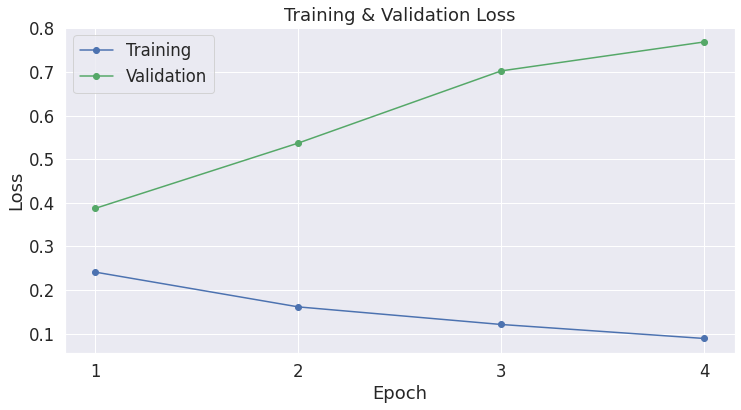

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

model.eval()
t0 = time.time()
predictions , true_labels = [], []

for step,batch in enumerate(testing_dataloader):
  if step % 40 == 0 and not step == 0:
    elapsed = format_time(time.time() - t0)
    print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(testing_dataloader), elapsed))
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)
  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')


Predicting labels for 3,500 test sentences...
  Batch    40  of    110.    Elapsed: 0:00:12.
  Batch    80  of    110.    Elapsed: 0:00:23.
    DONE.


In [ ]:
print('Toxic samples: %d of %d (%.2f%%)' % (df3.toxic.sum(), len(df3.toxic), (df3.toxic.sum() / len(df3.toxic) * 100.0)))

Toxic samples: 813 of 3500 (23.23%)


In [ ]:
print(predictions)

[array([[ 2.739403 , -3.0633993],
       [ 3.3575523, -3.476101 ],
       [ 3.8160136, -3.7202592],
       [-2.6934333,  2.2869902],
       [ 3.7315934, -3.6970587],
       [ 3.309978 , -3.4426453],
       [ 3.7847283, -3.7171478],
       [ 3.8041697, -3.7199326],
       [ 3.8213766, -3.7197952],
       [-2.6332242,  2.1927772],
       [ 2.226475 , -2.7144537],
       [-2.6122575,  2.1597595],
       [ 3.8096435, -3.7204022],
       [ 2.9069026, -3.176239 ],
       [ 3.7911897, -3.7181737],
       [ 3.766048 , -3.7113636],
       [ 3.6204538, -3.6402576],
       [ 3.761633 , -3.7094839],
       [ 3.5111086, -3.5727441],
       [ 2.1771576, -2.685033 ],
       [ 2.6079645, -2.9714806],
       [ 3.810629 , -3.7207353],
       [ 3.72928  , -3.6991086],
       [ 2.5597706, -2.9403782],
       [ 3.7159996, -3.6924784],
       [ 3.7823548, -3.7155895],
       [ 3.756834 , -3.707945 ],
       [ 2.96039  , -3.209848 ],
       [ 3.7818704, -3.7160335],
       [ 2.735269 , -3.0598414],
       [ 

In [ ]:
print(len(predictions),len(true_labels))

110 110


In [ ]:
print((true_labels[0][0]))


1


In [ ]:
print((predictions[0][0]))
print((predictions[0]))


[ 2.739403  -3.0633993]
[[ 2.739403  -3.0633993]
 [ 3.3575523 -3.476101 ]
 [ 3.8160136 -3.7202592]
 [-2.6934333  2.2869902]
 [ 3.7315934 -3.6970587]
 [ 3.309978  -3.4426453]
 [ 3.7847283 -3.7171478]
 [ 3.8041697 -3.7199326]
 [ 3.8213766 -3.7197952]
 [-2.6332242  2.1927772]
 [ 2.226475  -2.7144537]
 [-2.6122575  2.1597595]
 [ 3.8096435 -3.7204022]
 [ 2.9069026 -3.176239 ]
 [ 3.7911897 -3.7181737]
 [ 3.766048  -3.7113636]
 [ 3.6204538 -3.6402576]
 [ 3.761633  -3.7094839]
 [ 3.5111086 -3.5727441]
 [ 2.1771576 -2.685033 ]
 [ 2.6079645 -2.9714806]
 [ 3.810629  -3.7207353]
 [ 3.72928   -3.6991086]
 [ 2.5597706 -2.9403782]
 [ 3.7159996 -3.6924784]
 [ 3.7823548 -3.7155895]
 [ 3.756834  -3.707945 ]
 [ 2.96039   -3.209848 ]
 [ 3.7818704 -3.7160335]
 [ 2.735269  -3.0598414]
 [ 3.6521459 -3.658689 ]
 [ 2.2061431 -2.699214 ]]


In [ ]:
print(true_labels[0])
print(type(true_labels[0]))
print(true_labels)

[1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0]
<class 'numpy.ndarray'>
[array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1]), array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0]), array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1]), array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), array([0, 0, 

In [ ]:
for i in range(len(true_labels)):
    true_labels[i] = true_labels[i].tolist()

In [ ]:
test_labels = test_labels.tolist()

In [ ]:
print(type(true_labels))

<class 'list'>


In [ ]:
print(true_labels)

[[1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 0, 0, 

In [ ]:
def flatten_list(_2d_list):
    flat_list = []
    for element in _2d_list:
        if type(element) is list:
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

nested_list = true_labels
true_labels = flatten_list(nested_list)

In [ ]:
n = len(test_labels)

In [ ]:
print(type(test_labels), type(true_labels))

<class 'list'> <class 'list'>


In [ ]:
print(len(test_labels),len(true_labels))

3500 3500


In [ ]:
print(true_labels)

[1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [ ]:
print(test_labels)

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 

In [ ]:
def correct_or_wrong(test_data_set, result_data_set):
    correct = 0
    wrong = 0
    for i in range(len(test_data_set)):
            if test_data_set[i]==1 and result_data_set[i]==1:
                correct +=1
            elif test_data_set[i]==0 and result_data_set[i]==0:
                correct +=1
            elif test_data_set[i]==1 and result_data_set[i]==0:
                wrong +=1
            else:
                wrong +=1

    accuracy = correct/len(test_data_set)
    print(accuracy)

In [ ]:
correct_or_wrong(test_labels,true_labels)

0.6314285714285715


Note: Highest Score was a 64.34%

This accuarrcy might not seem like alot however, this was 7 laugues combined with the very complex problem determining hate speech along with any other NLP task.